# Time-Series Analysis and Forecasting with Corn and Wheat Prices

## Part 3 - Generate Seasonal ARIMA Forecasting Model for Wheat Price Time-Series Data and Test for Cointegration Between Corn and Wheat Prices

### A. Import Required Libraries

Import numpy and pandas libraries, and set %matplotlib inline.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

Import seasonal decomposition, autocorrelation (ACF) and partial autocorrelation function (PACF) graphs, differencing, augmented Dickey-Fuller test, and seasonal ARIMA with exogenous regressors (SARIMAX) tools from statsmodels library.

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

Import Pyramid Arima (pmdarima) tool to determine seasonal ARIMA (SARIMA) orders and select best SARIMA model.

In [3]:
from pmdarima.arima import auto_arima

Load specific evaluation tools.

In [4]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

Ignore harmless warnings.

In [5]:
import warnings
warnings.filterwarnings('ignore')

### B. Import, Inspect, and Visualize Joined Corn and Wheat Price Time-Series Data Set

Import corn and wheat price data pickle file into Pandas dataframe called corn_wheat3.

In [6]:
corn_wheat3 = pd.read_pickle('C://Users/kyrma/Python_for_TS_DA/Capstone_Project/Data/corn_wheat_prices.pickle')

Check number of rows and columns in corn_wheat3 dataframe.

In [7]:
corn_wheat3.shape

(450, 2)

View structure of corn_wheat3 dataframe.

In [8]:
corn_wheat3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1980-01-01 to 2017-06-01
Data columns (total 2 columns):
Corn_Price     450 non-null float64
Wheat_Price    450 non-null float64
dtypes: float64(2)
memory usage: 10.5 KB


View first five rows of corn_wheat3 dataframe.

In [9]:
corn_wheat3.head()

,Corn_Price,Wheat_Price
Date,,
1980-01-01,105.506813,175.634750
1980-02-01,114.167831,172.695236
1980-03-01,109.837318,163.509323
1980-04-01,108.262604,156.528030
1980-05-01,109.837318,161.304703


Plot out the corn and wheat price data with a reasonable figure size.

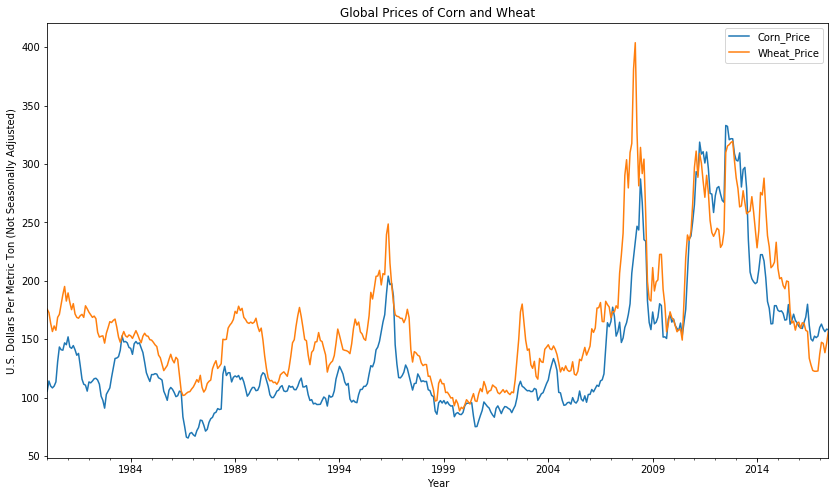

In [10]:
title1 = 'Global Prices of Corn and Wheat'
ylabel1 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel1 = 'Year'

ax1 = corn_wheat3.plot(figsize=(14,8), title=title1)
ax1.autoscale(axis='x', tight=True)
ax1.set(xlabel=xlabel1, ylabel=ylabel1);

### C. Build SARIMA Model and Forecast One Year Out for Wheat Price Time-Series Data

Run an additive error, trend, and seasonality (ETS) decomposition on the global wheat price data. The decomposition is additive because the wheat price time-series data does not show any exponential growth.

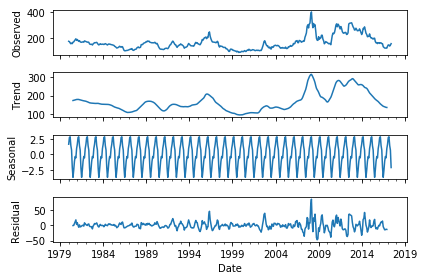

In [11]:
wheat_result = seasonal_decompose(corn_wheat3['Wheat_Price'], model='add')
wheat_result.plot();

* Like the additive ETS decomposition on the global corn price data, this decomposition shows that the trend component and observed time series follow a similar course. Also, the time series has a seasonal component and a large residual component. Again, the seasonal component is on a much smaller scale compared to the overall values. Nonetheless, it reveals that there is a definite annual seasonality for global wheat prices. Planting and harvest seasons in wheat-producing countries, planted acreage, weather, and growing conditions contribute to the shift in monthly global wheat prices.

Plot ACF plot to determine if the global wheat price data is stationary or not.

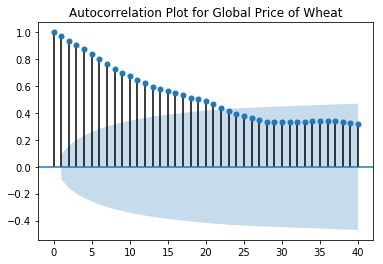

In [12]:
title2 = 'Autocorrelation Plot for Global Price of Wheat'
lags1 = 40
plot_acf(corn_wheat3['Wheat_Price'], title=title2, lags=lags1);

Plot PACF plot to determine if the global wheat price data is stationary or not.

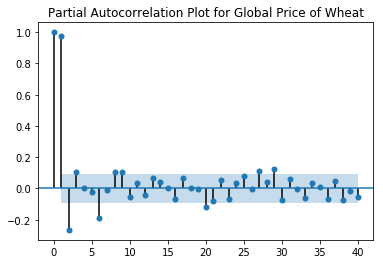

In [13]:
title3 = 'Partial Autocorrelation Plot for Global Price of Wheat'
plot_pacf(corn_wheat3['Wheat_Price'], title=title3, lags=lags1);

* The above ACF plot points out that the global wheat price data is not stationary. Hence, the data needs to be differenced until it is stationary.

Plot ACF plot of first difference for global wheat price data to determine if it is stationary or not.

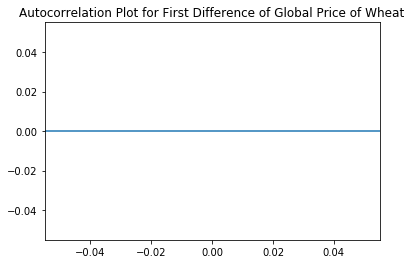

In [14]:
corn_wheat3['Wheat_Price_D1'] = diff(corn_wheat3['Wheat_Price'], k_diff=1)
title4 = 'Autocorrelation Plot for First Difference of Global Price of Wheat'
plot_acf(corn_wheat3['Wheat_Price_D1'], title=title4, lags=lags1);

Plot PACF plot of first difference for global wheat price data to determine if it is stationary or not.

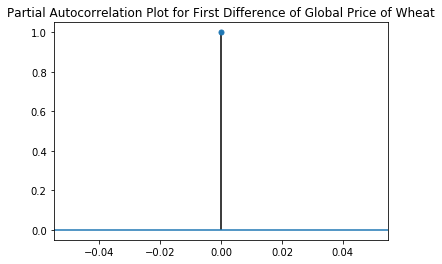

In [15]:
title5 = 'Partial Autocorrelation Plot for First Difference of Global Price of Wheat'
plot_pacf(corn_wheat3['Wheat_Price_D1'], title=title5, lags=lags1);

Plot out first difference of global wheat price data with a reasonable figure size.

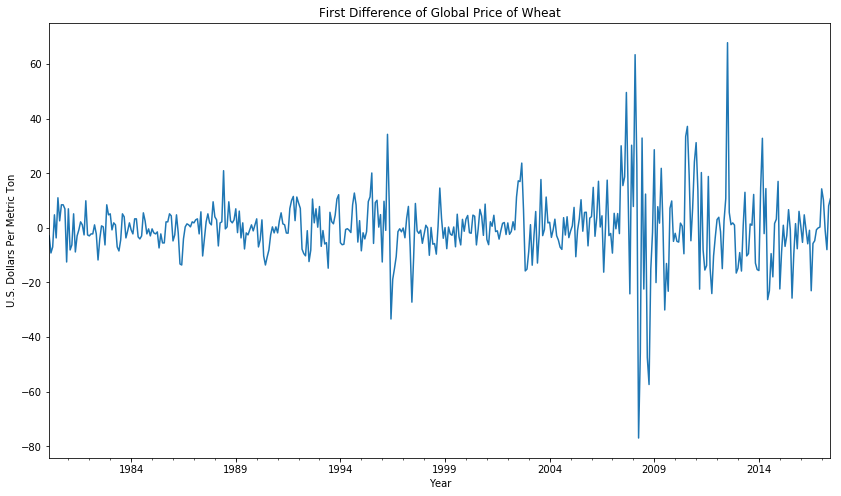

In [16]:
title6 = 'First Difference of Global Price of Wheat'
ylabel2 = 'U.S. Dollars Per Metric Ton'
xlabel2 = 'Year'

ax2 = corn_wheat3['Wheat_Price_D1'].plot(figsize=(14,8), title=title6)
ax2.autoscale(axis='x', tight=True)
ax2.set(xlabel=xlabel2, ylabel=ylabel2);

* The above PACF and first difference of global wheat price data indicate that the first difference is stationary.

Activate following function for running augmented Dickey-Fuller test.

In [17]:
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Subject global wheat price data to augmented Dickey-Fuller test.

In [18]:
adf_test(corn_wheat3['Wheat_Price'], title='Global Price of Wheat')

Augmented Dickey-Fuller Test: Global Price of Wheat
ADF test statistic       -2.574475
p-value                   0.098388
# lags used               8.000000
# observations          441.000000
critical value (1%)      -3.445266
critical value (5%)      -2.868116
critical value (10%)     -2.570273
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Subject first difference of global wheat price data to augmented Dickey-Fuller test.

In [19]:
adf_test(corn_wheat3['Wheat_Price_D1'], title='First Difference of Global Price of Wheat')

Augmented Dickey-Fuller Test: First Difference of Global Price of Wheat
ADF test statistic     -8.345815e+00
p-value                 3.087708e-13
# lags used             7.000000e+00
# observations          4.410000e+02
critical value (1%)    -3.445266e+00
critical value (5%)    -2.868116e+00
critical value (10%)   -2.570273e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Run pmdarima.auto_arima's stepwise function to obtain recommended orders of (p,d,q) and (P,D,Q)m for SARIMA model based off smallest Akaike information criterion (AIC). P, D, and Q represent the seasonal regression, differencing, and moving average coefficients, respectively, while m represents the number of rows in each seasonal cycle. The SARIMA model is built from the entire sample of global wheat price data.

In [20]:
wheat_stepwise_fit = auto_arima(corn_wheat3['Wheat_Price'], start_p=0, start_q=0,
                               max_p=6, max_q=3, m=12, 
                               seasonal=True, 
                               d=None, trace=True, 
                               error_action='ignore', # We don't want to know if an order does not work. 
                               suppress_warnings=True, # We don't want convergence warnings. 
                               stepwise=True) # Set to stepwise.

wheat_stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=3527.919, BIC=3544.348, Fit time=0.317 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=3529.398, BIC=3537.612, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=3508.376, BIC=3524.804, Fit time=0.230 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=3504.404, BIC=3520.832, Fit time=0.300 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=3502.014, BIC=3522.549, Fit time=0.549 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=3504.694, BIC=3521.122, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=3504.279, BIC=3528.921, Fit time=2.246 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=3504.249, BIC=3516.570, Fit time=0.099 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 12); AIC=3502.885, BIC=3531.634, Fit time=2.253 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  450
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1746.007
Date:                            Wed, 22 May 2019   AIC                           3502.014
Time:                                    18:25:35   BIC                           3522.549
Sample:                                         0   HQIC                          3510.108
                                            - 450                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.183      0.012      0.990      -0.356       0.361
ma.L1          0.2628      0.030      8.909      0.000       0.205       0.321
ar.S.L12       0.6607      0.191      3.454      0.001       0.286       1.036
ma.S.L12      -0.7509      0.176     -4.272      0.000      -1.095      -0.406
sigma2       139.5478      4.067     34.312      0.000     131.576     147.519
===================================================================================
Ljung-Box (Q):                       68.69   Jarque-Bera (JB):              1649.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.58   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Split global corn and wheat price data into training and test sets. The test set is 12 rows long since I want to make a year-long forecast.

In [21]:
train = corn_wheat3.iloc[:len(corn_wheat3) - 12]
test = corn_wheat3.iloc[len(corn_wheat3) - 12:]

Fit an SARIMA(0,1,1)(1,0,1,12) model to global wheat price training set.

In [22]:
wheat_train_model = SARIMAX(train['Wheat_Price'], order=(0,1,1), seasonal_order=(1,0,1,12))
wheat_results = wheat_train_model.fit()
wheat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        Wheat_Price   No. Observations:                  438
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1701.758
Date:                            Wed, 22 May 2019   AIC                           3411.516
Time:                                    18:25:35   BIC                           3427.836
Sample:                                01-01-1980   HQIC                          3417.956
                                     - 06-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2610      0.030      8.814      0.000       0.203       0.319
ar.S.L12       0.6734      0.191      3.533      0.000       0.300       1.047
ma.S.L12      -0.7618      0.174     -4.368      0.000      -1.104      -0.420
sigma2       141.0951      4.155     33.957      0.000     132.951     149.239
===================================================================================
Ljung-Box (Q):                       66.32   Jarque-Bera (JB):              1613.69
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              10.06   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Obtain predicted values from global wheat price training SARIMA(0,1,1)(1,0,1,12) model.

In [23]:
start = len(train)
end = len(train) + len(test) - 1
wheat_predictions = wheat_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Wheat SARIMA(0,1,1)(1,0,1,12) Predictions')

Plot predictions against known global wheat prices in test set.

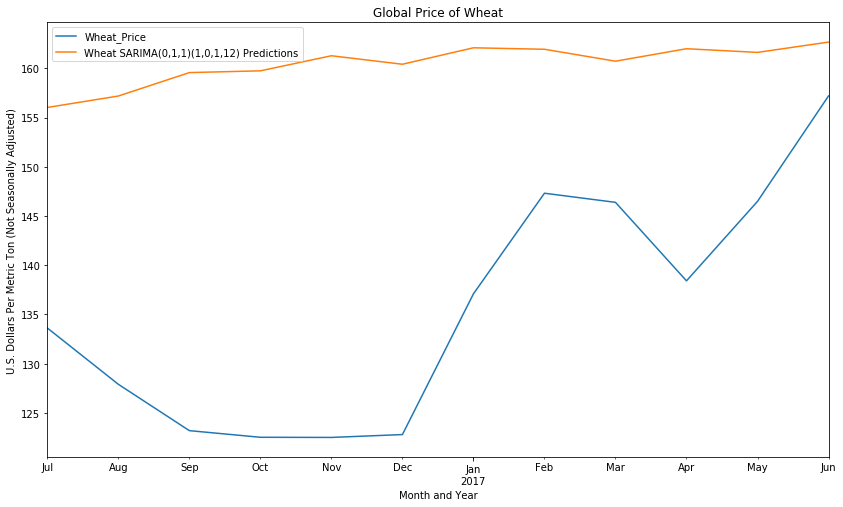

In [24]:
title7 = 'Global Price of Wheat'
ylabel3 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel3 = 'Month and Year'

ax3 = test['Wheat_Price'].plot(legend=True, figsize=(14,8), title=title7)
wheat_predictions.plot(legend=True)
ax3.autoscale(axis='x', tight=True)
ax3.set(xlabel=xlabel3, ylabel=ylabel3);

Evaluate global wheat price training SARIMA(0,1,1)(1,0,1,12) model with mean squared error (MSE) and root mean squared error (RMSE).

In [25]:
wheat_error1 = mean_squared_error(test['Wheat_Price'], wheat_predictions)
wheat_error2 = rmse(test['Wheat_Price'], wheat_predictions)
print(f'SARIMA(0,1,1)(1,0,1,12) MSE Error: {wheat_error1:11.10}')
print(f'SARIMA(0,1,1)(1,0,1,12) RMSE Error: {wheat_error2:11.10}')

SARIMA(0,1,1)(1,0,1,12) MSE Error: 737.1075716
SARIMA(0,1,1)(1,0,1,12) RMSE Error: 27.14972507


Retrain SARIMA(0,1,1)(1,0,1,12) model on entire global wheat price data and forecast one year into the future.

In [26]:
wheat_full_model = SARIMAX(corn_wheat3['Wheat_Price'], order=(0,1,1), seasonal_order=(1,0,1,12))
wheat_full_results = wheat_full_model.fit()
wheat_forecast = wheat_full_results.predict(len(corn_wheat3), len(corn_wheat3) + 11, typ='levels').rename('Wheat SARIMA(0,1,1)(1,0,1,12) Forecast')

Plot forecasted global wheat prices alongside original wheat price data.

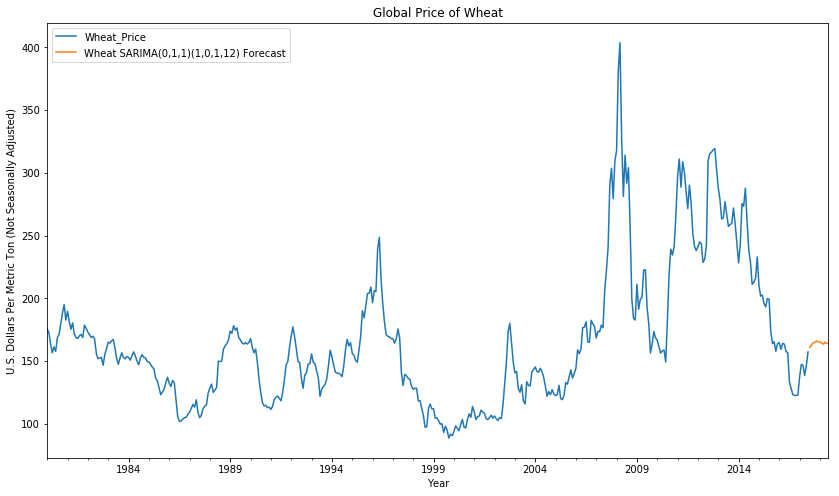

In [27]:
title8 = 'Global Price of Wheat'
ylabel4 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel4 = 'Year'

ax4 = corn_wheat3['Wheat_Price'].plot(legend=True, figsize=(14,8), title=title8)
wheat_forecast.plot(legend=True)
ax4.autoscale(axis='x', tight=True)
ax4.set(xlabel=xlabel4, ylabel=ylabel4);

### D. Test for Cointegration Between Corn and Wheat Price Time-Series Data Using Engle-Granger Two-Step Method

Plot global corn and wheat prices against one another in bivariate scatterplot.

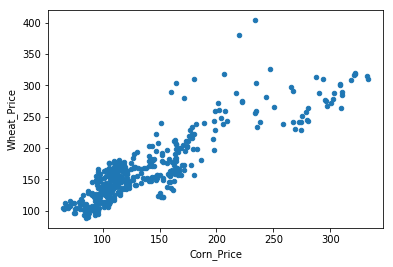

In [28]:
corn_wheat3.plot(kind='scatter', x='Corn_Price', y='Wheat_Price');

Run ordinary least-squares regression between global wheat and corn prices with intercept set at 0, and obtain regression output and slope.

In [29]:
import statsmodels.api as sm

In [30]:
ols_model = sm.OLS(corn_wheat3['Wheat_Price'], corn_wheat3['Corn_Price'])
ols_model_results = ols_model.fit()
print(ols_model_results.summary())
print(f'OLS Regression Slope Coefficient: {ols_model_results.params[0]:11.10}')

                            OLS Regression Results                            
Dep. Variable:            Wheat_Price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        18:25:37   Log-Likelihood:                -2201.1
No. Observations:                 450   AIC:                             4404.
Df Residuals:                     449   BIC:                             4408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Corn_Price     1.1508      0.010    112.602      0.0

Calculate spread or difference between global wheat prices and product of slope and global corn prices. 

In [31]:
corn_wheat3['Spread'] = corn_wheat3['Wheat_Price'] - (ols_model_results.params[0] * corn_wheat3['Corn_Price'])

Plot wheat-corn global price spread.

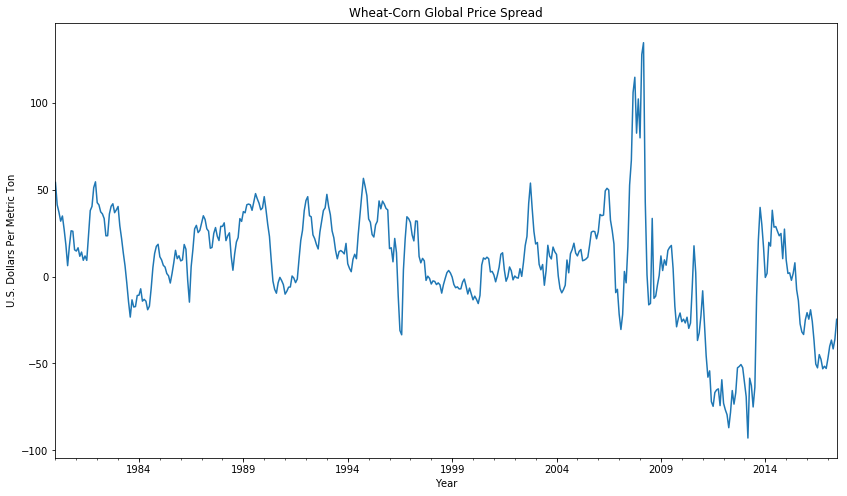

In [32]:
title9 = 'Wheat-Corn Global Price Spread'
ylabel5 = 'U.S. Dollars Per Metric Ton'
xlabel5 = 'Year'

ax5 = corn_wheat3['Spread'].plot(figsize=(14,8), title=title9)
ax5.autoscale(axis='x', tight=True)
ax5.set(xlabel=xlabel5, ylabel=ylabel5);

Activate following function for running augmented Dickey-Fuller test upon wheat-corn global price spread to test for cointegration.

In [33]:
def coint_adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), maxlag=1) # .dropna() handles differenced data, set number of lags used to 1 
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Subject wheat-corn global price spread to augmented Dickey-Fuller test.

In [34]:
coint_adf_test(corn_wheat3['Spread'], title='Wheat-Corn Global Price Spread')

Augmented Dickey-Fuller Test: Wheat-Corn Global Price Spread
ADF test statistic       -4.786602
p-value                   0.000058
# lags used               1.000000
# observations          448.000000
critical value (1%)      -3.445031
critical value (5%)      -2.868013
critical value (10%)     -2.570218
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


* The above augmented Dickey-Fuller test results reveal that the wheat-corn global price spread is a stationary time series. This spread is stationary and mean reverting while the global corn and wheat prices are non-stationary time series that both have a common stochastic or random trend. Given these conditions, I can conclude that global corn and wheat prices are cointegrated with one another.